![dt](img/dt1.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
# 后两个特征
X = iris.data[:, 2:]
y = iris.target

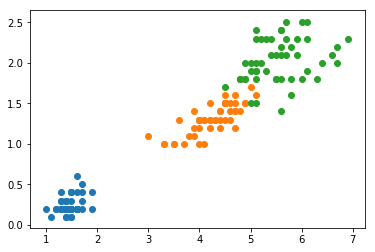

In [4]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [5]:
# 有3类结果
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=3, criterion="entropy")
# entropy 交叉熵
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
def plot_decision_boundry(model, axis):
    # meshgrid 可以参考项目03-第3章JupyterNotebook_numpy和map/numpy.ipynb
    # 其实就是分别生成按行看的矩阵和 按列看的矩阵
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    return

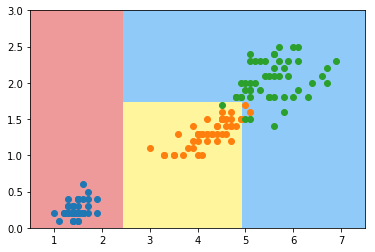

In [8]:
plot_decision_boundry(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

### 决策树可以天然解决多分类问题.
#### 也可以用来解决回归问题 把叶子节点落在同一叶子里面的值的平均值当做回归值
#### 有非常好的可解释性
![dt](img/dt2.png)

# 熵 shang entropy
代表随机变量的不确定度<br>
熵越大, 数据的不确定越大
![dt](img/dt3.png)
k是分类的个数, pi是每一类的比例

In [9]:
# 下面假设我们只有2类, 一类占比为x,另外一类为1-x 我们来看看函数图像
def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

In [10]:
x=np.linspace(0.01, 0.99, 200)

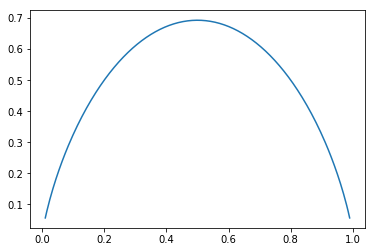

In [11]:
plt.plot(x, entropy(x))
plt.show()

# 使熵达到最小的最佳划分

In [12]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

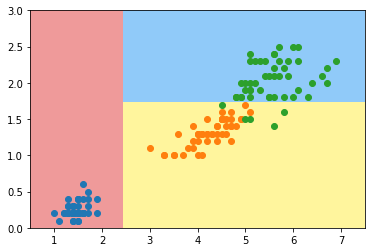

In [13]:
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)
plot_decision_boundry(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

## 模拟使用熵划分

In [14]:
def split(X, y, d, value):
    # 在节点X上基于维度d的Value进行划分
    index_a = (X[:, d] <= value)
    index_b = (X[:, d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [16]:
#计算熵
from collections import Counter
from math import log
def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p*log(p)
    return res

# 找到d, value
def trySplit(X, y):
    best_entropy = float("inf")
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):  # 遍历每个维度
        # 对于阈值可选的值 排序后 我们每次取2个相近的值的中间值作为阈值
        sort_index = np.argsort(X[:, d])
        for i in range(1, len(X)):
            # 取两个值作为候选值
            # 去掉那个左右相等的, 因为我没法区分这2个值
            if X[sort_index[i-1], d] != X[sort_index[i], d]:
                v = (X[sort_index[i-1], d]+ X[sort_index[i], d])/2 
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                e = entropy(y_l) + entropy(y_r)
                # 如果这次entropy更低?
                if e < best_entropy:
                    best_entropy = e
                    best_d = d
                    best_v = v
                    
    return best_entropy, best_d, best_v
                

In [18]:
best_entropy, best_d, best_v = trySplit(X,y)

In [19]:
print("en", best_entropy, "d", best_d, "v", best_v)

en 0.6931471805599453 d 0 v 2.45


In [20]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v )

In [21]:
entropy(y1_l)

0.0

In [22]:
entropy(y1_r)

0.6931471805599453

In [23]:
# 对右边接着划分
best_entropy2, best_d2, best_v2 = trySplit(X1_r, y1_r)
print("entropy2:", best_entropy2, "d", best_d2, "v", best_v2)

entropy2: 0.4132278899361904 d 1 v 1.75


In [24]:
# 这个可以拿来与scikitlearn中的图进行对比

In [25]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2 )

In [26]:
entropy(y2_l)

0.30849545083110386

In [27]:
entropy(y2_r)

0.10473243910508653

In [29]:
# 这里可以看出来还没有变为0, 意味着你还可以继续划分
# 这里的maxdepth的意思

# 另外一个指标划分  基尼系数  (除了熵之外)
$$
G=1-\sum_{i=1}^{k}(p^2_i)
$$

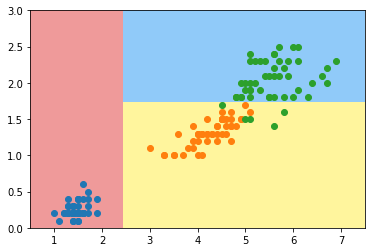

In [31]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini")
dt_clf.fit(X, y)
plot_decision_boundry(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [32]:
# 类似的 可以使用类似的方法来模拟gini的计算

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num/len(y)
        res-= p **2
    return res